In [12]:
import openai
import os
import numpy as np
from  dotenv import load_dotenv,find_dotenv
from langchain.embeddings import OpenAIEmbeddings
load_dotenv(find_dotenv(),override=True)


True

In [7]:
ln1="Missing flamingo found by the swimming pool"
ln2="Sea otter spotted on surfboard by beach"
ln3="Baby panda enjoys boat ride"

ln4="Breakfast themed food truck beloved by all"
ln5="New curry restaurant aims to pleas!"

total_texts = [ln1,ln2,ln3,ln4,ln5]

In [13]:
embeddings = []
embedding_model = OpenAIEmbeddings()
for text in total_texts:
    embeddings.append(embedding_model.embed_query(text))

embeddings_arr = np.array(embeddings)


In [14]:
print(f'Shape:{embeddings_arr.shape}')

Shape:(5, 1536)


In [15]:
from sklearn.decomposition import PCA

PCA_model = PCA(n_components=2)
PCA_model.fit(embeddings_arr)
new_values = PCA_model.transform(embeddings_arr)

In [16]:
print(new_values)

[[-0.20553934  0.3528725 ]
 [-0.2239241  -0.11736279]
 [-0.19793128 -0.21801391]
 [ 0.27118869 -0.10973238]
 [ 0.35620603  0.09223658]]


[-0.20553934  0.3528725 ]
[-0.2239241  -0.11736279]
[-0.19793128 -0.21801391]
[ 0.27118869 -0.10973238]
[0.35620603 0.09223658]


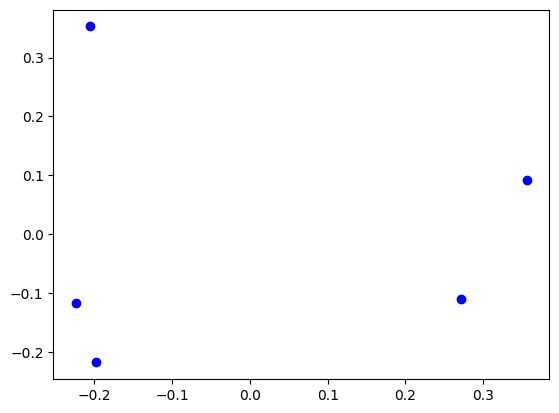

In [27]:
import matplotlib.pyplot as plt
import mplcursors

for i,value in enumerate(new_values):
    print(value)
    plt.scatter(value[0],value[1],data=f"ln{i}",c='blue')